# **k-MEANS**

# **Importing libraries and load the data**

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [8]:
df = pd.read_csv('iris.csv')


In [9]:
df.head(7)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


# **Statistical Summary**

In [11]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Checking the data type of each attribute**

In [12]:
df.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
Class            object
dtype: object

In [13]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)

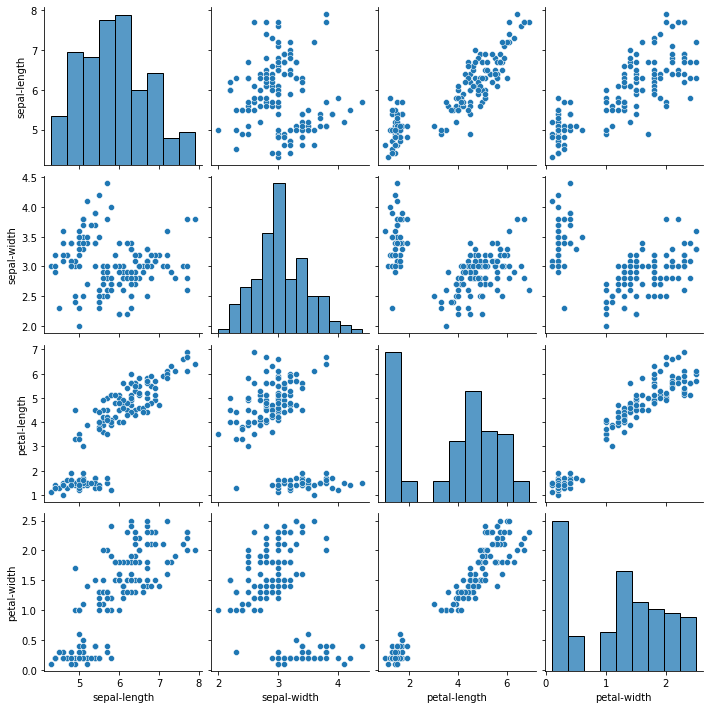

In [15]:
sns.pairplot(df)

# **Splitting the dataset into the Training set and Test set**

In [16]:
# Splitting the dataset into the Training set and Test set  
X = df.iloc[:, [0,1,2, 3]].values

# Using the elbow method to find the optimal number of clusters

In [17]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

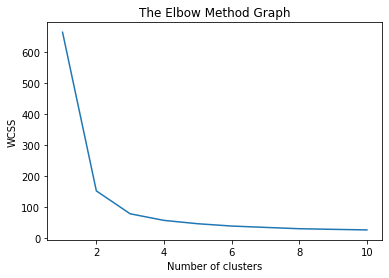

In [18]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#**Fitting K-Means to the dataset**

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0,n_init=10)
y_kmeans = kmeans.fit_predict(X)



#**Visualising the clusters**

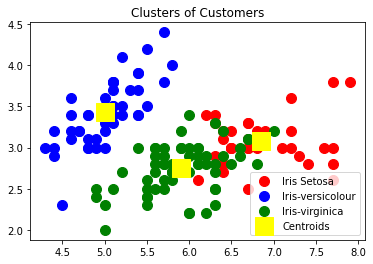

In [23]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Iris Setosa')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Iris-versicolour')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids',marker=',')
plt.title('Clusters of Customers')
plt.legend()
plt.show() 

In [24]:
df['Class'] = pd.Categorical(df['Class'])
df['Class'] = df['Class'].cat.codes

In [22]:
from sklearn.metrics import classification_report

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print(classification_report(df['Class'],kmeans.labels_,target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        48
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.21      0.27      0.24        49

       accuracy                           0.09       147
      macro avg       0.07      0.09      0.08       147
   weighted avg       0.07      0.09      0.08       147

